# Análisis y Modelo de Regresión Logística  
**Objetivo:** Predecir `HeartDiseaseorAttack` (0/1) usando un modelo de regresión logística.  
**Dataset:** `/Users/josetanchez/Desktop/heart_disease_health_indicators_BRFSS2015.csv`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, roc_auc_score, roc_curve
)

RANDOM_STATE = 42
pd.set_option('display.max_columns', None)

## 1. Carga y vista previa de datos

In [3]:
df = pd.read_csv('/Users/josetanchez/Desktop/heart_disease_health_indicators_BRFSS2015.csv')
display(df.head())
df.info()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## 2. Análisis exploratorio (EDA) rápido
- Resumen estadístico de las variables numéricas.
- Conteo de valores faltantes.
- Distribución de la variable objetivo.

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Nulos por columna:
 HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


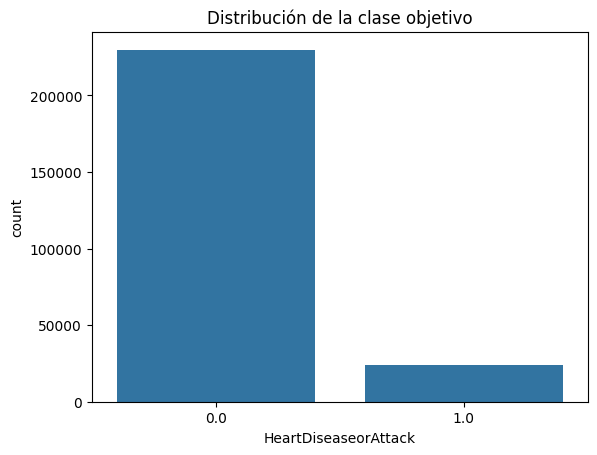

In [4]:
display(df.describe().T)
print("Nulos por columna:\n", df.isna().sum())
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title('Distribución de la clase objetivo')
plt.show()

## 3. Definición de funciones de métricas y KS

In [6]:
def ks_stat(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    return np.max(tpr - fpr)

def eval_model(y_true, y_pred, y_proba):
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("ROC AUC  :", roc_auc_score(y_true, y_proba))
    print("KS       :", ks_stat(y_true, y_proba))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

## 4. Modelo Baseline  
- Sin tratamiento especial de variables: todas las features raw.

In [7]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

baseline = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
y_proba_base = baseline.predict_proba(X_test)[:,1]

eval_model(y_test, y_pred_base, y_proba_base)

Accuracy : 0.9071796489015032
Precision: 0.5298850574712644
Recall   : 0.12862723214285715
ROC AUC  : 0.8459590488839157
KS       : 0.5441014809025764
Confusion matrix:
 [[68118   818]
 [ 6246   922]]


## 5. Transformación de variables categóricas  
- Binarias (0/1): se dejan igual  
- `Diabetes`, `GenHlth`, `Education`, `Income`: One-Hot Encoding

In [8]:
cat_feats = ['Diabetes','GenHlth','Education','Income']
X_enc = pd.get_dummies(X, columns=cat_feats, drop_first=True)

X_train_e, X_test_e, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)
print("Dimensiones tras encoding:", X_train_e.shape, X_test_e.shape)

Dimensiones tras encoding: (177576, 35) (76104, 35)


## 6. Escalado de variables continuas  
- `BMI`, `MentHlth`, `PhysHlth`

In [9]:
scaler = StandardScaler()
cont_feats = ['BMI','MentHlth','PhysHlth']
X_train_e[cont_feats] = scaler.fit_transform(X_train_e[cont_feats])
X_test_e[cont_feats]  = scaler.transform(X_test_e[cont_feats])

## 7. Feature Engineering (ejemplos)  
- Crear categoría de BMI:  
  - Bajo peso, Normal, Sobrepeso, Obesidad  